In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#importing the data 
pb_investor_info = pd.read_csv('/content/drive/My Drive/pb_data/investor_info.csv', encoding= 'unicode_escape')
pb_investor_info.columns


pb_investor_info['last_investment_type'] = pd.to_numeric(pb_investor_info['last_investment_type'], errors='coerce')
pb_investor_info['last_investment_class'] = pd.to_numeric(pb_investor_info['last_investment_class'], errors='coerce')
pb_investor_info['primary_investor_type'] = pd.to_numeric(pb_investor_info['primary_investor_type'], errors='coerce')

pb_investor_info['investor_id'] = pb_investor_info['investor_id'].astype(float)
pb_investor_info['total_funds_open'] = pb_investor_info['total_funds_open'].astype(float)
pb_investor_info['total_funds_closed'] = pb_investor_info['total_funds_closed'].astype(float)
pb_investor_info['AUM'] = pb_investor_info['AUM'].astype(float)
pb_investor_info['dry_powder'] = pb_investor_info['dry_powder'].astype(float)
pb_investor_info['last_investment_valuation'] = pb_investor_info['last_investment_valuation'].astype(float)
pb_investor_info['last_investment_size'] = pb_investor_info['last_investment_size'].astype(float)

pb_investor_info['investments_last_5_yrs'] = pb_investor_info['investments_last_5_yrs'].astype(float)
pb_investor_info['investments_last_2_yrs'] = pb_investor_info['investments_last_2_yrs'].astype(float)
pb_investor_info['last_investment_class'] = pb_investor_info['last_investment_class'].astype(float)
pb_investor_info['last_investment_valuation'] = pb_investor_info['last_investment_valuation'].astype(float)
pb_investor_info['last_investment_size'] = pb_investor_info['last_investment_size'].astype(float)


pb_investor_id = pd.read_csv('/content/drive/My Drive/pb_data/investor_id.csv')
pb_investor_id.columns

pb_lp_info = pd.read_csv('/content/drive/My Drive/pb_data/lp_info.csv')
pb_lp_info.columns

pb_lp_id = pd.read_csv('/content/drive/My Drive/pb_data/lp_id.csv')
pb_lp_id.columns

pb_investor_lp = pd.read_csv('/content/drive/My Drive/pb_data/investor_lp.csv')
pb_investor_lp.columns

pb_investor_info.fillna(0,inplace=True)
pb_lp_info.fillna(0, inplace=True)

pb_lp_info.columns
pb_lp_info.dtypes

pb_lp_info['limited_partner_type'] = pd.to_numeric(pb_lp_info['limited_partner_type'], errors='coerce')
pb_lp_info['limited_partner_type'] = pb_lp_info['limited_partner_type'].astype(float)

pb_lp_info = pd.read_csv('/content/drive/My Drive/pb_data/lp_info.csv', encoding= 'unicode_escape')
pb_lp_info.columns
pb_lp_info.dtypes

pb_lp_info.fillna(0, inplace=True)


Index(['ï»¿lp_id', 'cmmt_in_vc_funds', 'total_cmmt_in_vc_funds',
       'limited_partner_type', 'AUM', 'affliated_funds_num',
       'affliated_investors_num', 'commitments', 'total_cmmt', 'hq_location'],
      dtype='object')

In [5]:
#for LP

# need to clean teh data in order to get this part to run


#split into train-validate set (90%) and test set (10%) with random_state=0

X1 = pb_lp_info[['ï»¿lp_id', 'cmmt_in_vc_funds', 'total_cmmt_in_vc_funds',
        'AUM', 'affliated_funds_num',
       'affliated_investors_num',  'total_cmmt']]
y1 = pb_lp_info.commitments

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.1, random_state = 0)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import statsmodels.api as sm
linreg = LinearRegression()
scaler = StandardScaler()
minscaler = MinMaxScaler()
robust = RobustScaler()
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pipe1 = make_pipeline(MinMaxScaler(),Lasso(max_iter=1000, tol=1e2))
param_grid = {'lasso__alpha': np.logspace(1,5,10)}
grid1 = GridSearchCV(pipe1, param_grid, cv=5, return_train_score=True)
grid1.fit(X1, y1)
features1=['lp_id', 'cmmt_in_vc_funds', 'total_cmmt_in_vc_funds',
        'AUM', 'affliated_funds_num',
       'affliated_investors_num',  'total_cmmt']

lasso1 = Lasso(alpha=grid1.best_params_['lasso__alpha'], tol=1e2)
lasso1.fit(X1_train, y1_train)
lasso1.score(X1_test, y1_test)

grid1.best_params_
grid1.best_score_

pd.Series(lasso1.coef_,index=features1).sort_values(ascending=False)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


total_cmmt_in_vc_funds     1.767741e-02
total_cmmt                 1.599606e-04
AUM                        2.570849e-07
cmmt_in_vc_funds           0.000000e+00
affliated_funds_num        0.000000e+00
affliated_investors_num    0.000000e+00
lp_id                     -1.474137e-02
dtype: float64

this means that the most influential featuers in determining number of commitments are total commitments, total commitments in vc funds, and AUM - but very small coefficients... nothing really worth presenting on

In [15]:
#for investors
#split into train-validate set (90%) and test set (10%) with random_state=0
X = pb_investor_info[['investor_id', 'investment_num', 'total_funds_open',
       'total_funds_closed', 'total_investments', 'dry_powder', 'last_investment_type',
       'last_investment_valuation', 'last_investment_size',
       'last_investment_class',
       'investments_last_2_yrs', 'investments_last_12_months',
       'investments_last_6_months', 'active_porfolio', 'exits',
       'last_closed_fund_size', 
       'primary_investor_type', 'max_fund_size', 'median_fund_size',
       'min_fund_size', 'fund_closed_num', 'total_investments_last_5_yrs',
       'total_investments_last_2_yrs', 'total_investments_last_12_months',
       'total_investments_last_6_months', 'total _active_portfolio',
       'total_exits', 'total_investments_last_5_yrs']]
y = pb_investor_info.AUM

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import statsmodels.api as sm
linreg = LinearRegression()
scaler = StandardScaler()
minscaler = MinMaxScaler()
robust = RobustScaler()
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(MinMaxScaler(),Lasso(max_iter=1000, tol=1e2))
param_grid = {'lasso__alpha': np.logspace(1,5,10)}
grid2 = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)
grid2.fit(X, y)


features=['investor_id', 'investment_num', 'total_funds_open',
       'total_funds_closed', 'total_investments', 'dry_powder', 'last_investment_type',
       'last_investment_valuation', 'last_investment_size',
       'last_investment_class',
       'investments_last_2_yrs', 'investments_last_12_months',
       'investments_last_6_months', 'active_porfolio', 'exits',
       'last_closed_fund_size', 
       'primary_investor_type', 'max_fund_size', 'median_fund_size',
       'min_fund_size', 'fund_closed_num', 'total_investments_last_5_yrs',
       'total_investments_last_2_yrs', 'total_investments_last_12_months',
       'total_investments_last_6_months', 'total _active_portfolio',
       'total_exits', 'total_investments_last_5_yrs']

lasso = Lasso(alpha=grid2.best_params_['lasso__alpha'], tol=1e2)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

grid2.best_params_
grid2.best_score_

pd.Series(lasso.coef_,index=features).sort_values(ascending=False)

total_funds_closed                  0.413064
exits                               0.080574
dry_powder                          0.074083
last_closed_fund_size               0.072561
total_exits                         0.033040
total_investments_last_5_yrs        0.028708
investment_num                      0.025190
investments_last_12_months          0.024515
total_investments_last_2_yrs        0.006251
last_investment_valuation           0.001579
last_investment_size                0.000868
median_fund_size                    0.000349
max_fund_size                       0.000189
min_fund_size                       0.000051
total_funds_open                    0.000000
total_investments_last_6_months     0.000000
total_investments_last_12_months    0.000000
total_investments_last_5_yrs        0.000000
fund_closed_num                     0.000000
last_investment_type                0.000000
primary_investor_type               0.000000
investments_last_6_months           0.000000
investment

the most important factors when predicting AUM are total funds closed, exits, dry powder, last closed fund size,total exits, and total invest,ents in the past five years

In [ ]:
#investor correlation matrix
corrMatrix_investor = pb_investor_info.corr()
print (corrMatrix_investor)

                                  investor_id  investment_num  \
investor_id                          1.000000       -0.089095   
investment_num                      -0.089095        1.000000   
total_funds_open                    -0.598458        0.076865   
total_funds_closed                  -0.106063        0.361457   
AUM                                 -0.082595        0.039289   
dry_powder                          -0.210712        0.023851   
last_investment_type                      NaN             NaN   
last_investment_valuation           -0.008775       -0.005374   
last_investment_size                -0.008890       -0.001563   
last_investment_class                     NaN             NaN   
investments_last_5_yrs              -0.147504        0.860991   
investments_last_2_yrs              -0.167669        0.660527   
investments_last_12_months          -0.159575        0.563526   
investments_last_6_months           -0.159902        0.536065   
active_porfolio          

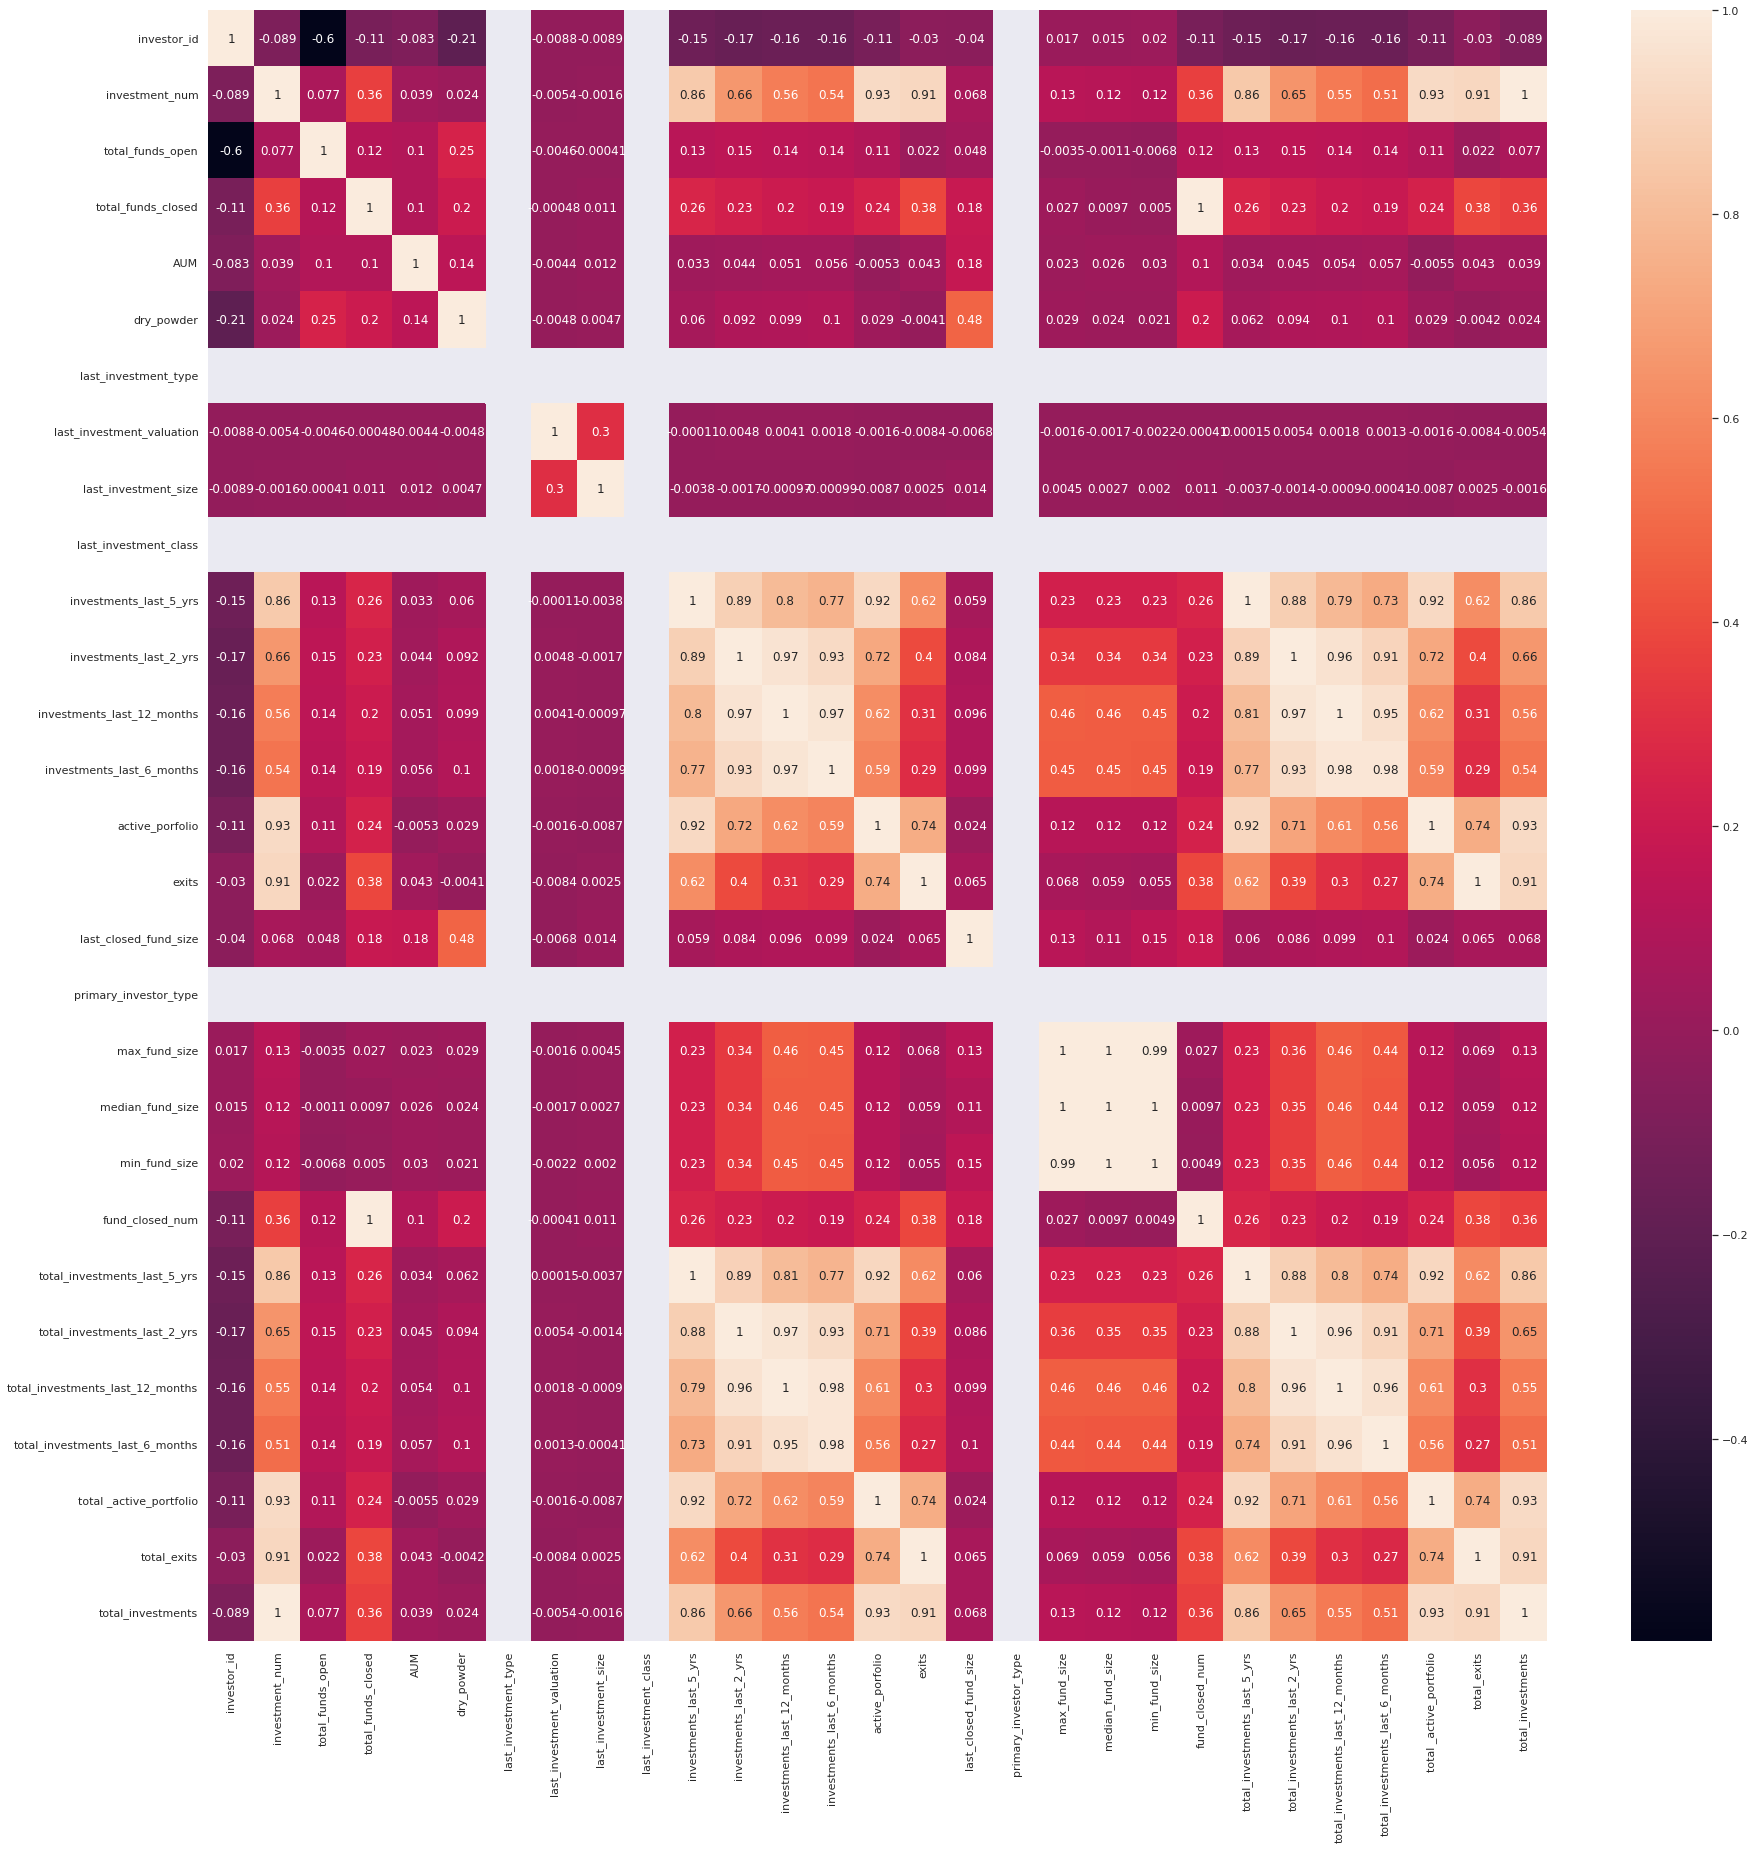

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corrMatrix_investor, annot=True)
sns.set(rc = {'figure.figsize':(34,34)})
plt.show()

In [ ]:
#lp correlation matrix
corrMatrix_lp = pb_lp_info.corr()
print (corrMatrix_lp)

                         ï»¿lp_id  cmmt_in_vc_funds  total_cmmt_in_vc_funds  \
ï»¿lp_id                 1.000000         -0.637992               -0.378492   
cmmt_in_vc_funds        -0.637992          1.000000                0.492472   
total_cmmt_in_vc_funds  -0.378492          0.492472                1.000000   
AUM                     -0.062453          0.061182                0.040491   
affliated_funds_num     -0.775296          0.865078                0.515536   
affliated_investors_num -0.666778          0.816046                0.499709   
commitments             -0.769613          0.869070                0.570505   
total_cmmt              -0.367834          0.327522                0.859038   

                              AUM  affliated_funds_num  \
ï»¿lp_id                -0.062453            -0.775296   
cmmt_in_vc_funds         0.061182             0.865078   
total_cmmt_in_vc_funds   0.040491             0.515536   
AUM                      1.000000             0.070450  

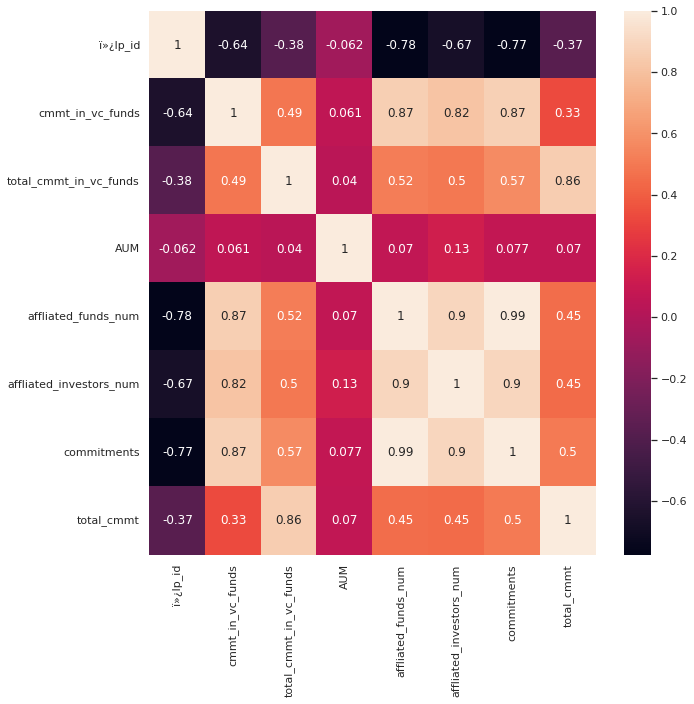

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corrMatrix_lp, annot=True)
sns.set(rc = {'figure.figsize':(12,8)})
plt.show()

In [17]:
#PCA attempt
X_lp = pb_lp_info[['ï»¿lp_id', 'cmmt_in_vc_funds', 'total_cmmt_in_vc_funds',
        'AUM', 'affliated_funds_num',
       'affliated_investors_num',  'total_cmmt']]

from sklearn.decomposition import PCA
pca_lp = PCA(n_components=2)
pca_lp.fit(X_lp)

print(pca_lp.components_)

[[-3.94292304e-05  6.80187681e-07  7.57145328e-06  9.99999998e-01
   8.57500782e-07  1.21009580e-06  4.62023295e-05]
 [-6.35941870e-01  8.15750054e-03  1.93446871e-01 -6.10737351e-05
   1.13536041e-02  7.62497183e-03  7.46928814e-01]]


In [14]:
print(pca_lp.explained_variance_)

[8.1798211e+10 4.8126914e+04]


In [18]:
#PCA investor
X_inv = pb_investor_info[['investor_id', 'investment_num', 'total_funds_open',
       'total_funds_closed', 'total_investments', 'dry_powder', 'last_investment_type',
       'last_investment_valuation', 'last_investment_size',
       'last_investment_class',
       'investments_last_2_yrs', 'investments_last_12_months',
       'investments_last_6_months', 'active_porfolio', 'exits',
       'last_closed_fund_size', 
       'primary_investor_type', 'max_fund_size', 'median_fund_size',
       'min_fund_size', 'fund_closed_num', 'total_investments_last_5_yrs',
       'total_investments_last_2_yrs', 'total_investments_last_12_months',
       'total_investments_last_6_months', 'total _active_portfolio',
       'total_exits', 'total_investments_last_5_yrs']]

from sklearn.decomposition import PCA
pca_inv = PCA(n_components=2)
pca_inv.fit(X_inv)

print(pca_inv.components_)

[[ 8.80175295e-03  3.85486704e-03 -2.12922743e-06  1.97153672e-05
   3.85517096e-03  1.16578258e-03 -6.33521336e-35 -2.46836543e-03
   3.07764251e-04 -9.08105086e-37  2.34921933e-03  1.91122124e-03
   1.01108154e-03  2.08337736e-03  7.05871339e-04  5.65930063e-03
   0.00000000e+00  7.76713990e-01  5.44961920e-01  3.15487086e-01
   1.97764897e-05  3.48641350e-03  2.32078283e-03  1.70280031e-03
   7.31563277e-04  2.08326055e-03  7.13617482e-04  3.48641350e-03]
 [-8.64584424e-03 -1.95762201e-04 -7.95455099e-07  2.89700405e-07
  -1.95888357e-04 -2.28752614e-04 -7.73400484e-35  9.99130179e-01
   4.07103654e-02 -2.04363664e-37  6.60772030e-05  3.87870601e-05
   1.32994293e-05 -1.60632403e-05 -1.23316900e-04 -3.81360546e-04
  -0.00000000e+00  2.05279759e-03  1.39594015e-03  5.64496827e-04
   3.89344059e-07  3.66286674e-05  6.90208402e-05  2.20724412e-05
   8.71764610e-06 -1.59355966e-05 -1.23929878e-04  3.66286674e-05]]


In [19]:
print(pca_inv.explained_variance_)

[4862152.282346   2452361.91313407]


In [ ]:
#beginning PCA

#don't know if what i did here down is correct

# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
Xlp = pb_lp_info[['ï»¿lp_id', 'cmmt_in_vc_funds', 'total_cmmt_in_vc_funds',
        'AUM', 'affliated_funds_num',
       'affliated_investors_num',  'total_cmmt']]
ylp = pb_lp_info.commitments


# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
 
Xlp_train, Xlp_test, ylp_train, ylp_test = train_test_split(Xlp, ylp, test_size = 0.2, random_state = 0)

In [ ]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
Xlp_train = sc.fit_transform(Xlp_train)
Xlp_test = sc.transform(Xlp_test)

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
Xlp_train = pca.fit_transform(Xlp_train)
Xlp_test = pca.transform(Xlp_test)
 
explained_variance = pca.explained_variance_ratio_

In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(Xlp_train, ylp_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
# Predicting the test set result using
# predict function under LogisticRegression
ylp_pred = classifier.predict(Xlp_test)

In [ ]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(ylp_test, ylp_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

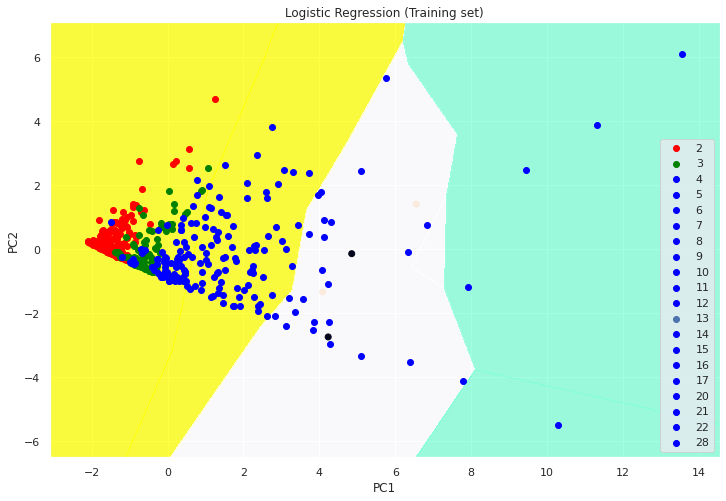

In [ ]:

# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap
 
Xlp_set, ylp_set = Xlp_train, ylp_train
X1, X2 = np.meshgrid(np.arange(start = Xlp_set[:, 0].min() - 1,
                     stop = Xlp_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = Xlp_set[:, 1].min() - 1,
                     stop = Xlp_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(ylp_set)):
    plt.scatter(Xlp_set[ylp_set == j, 0], Xlp_set[ylp_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

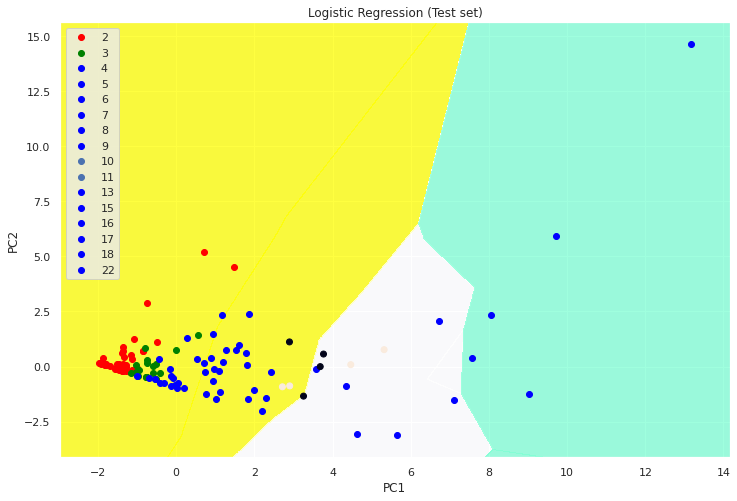

In [ ]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
 
Xlp_set, ylp_set = Xlp_test, ylp_test
 
X1, X2 = np.meshgrid(np.arange(start = Xlp_set[:, 0].min() - 1,
                     stop = Xlp_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = Xlp_set[:, 1].min() - 1,
                     stop = Xlp_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(ylp_set)):
    plt.scatter(Xlp_set[ylp_set == j, 0], Xlp_set[ylp_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# showscatter plot
plt.show()